In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # Notes and exercises from [Statlect](https://www.statlect.com)
 ---

 # Part 3 - [Probability Distributions](https://www.statlect.com/probability-distributions/)

 ## Bernoulli Distribution

 Scenario:
 A single coin flip, with only two possible outcomes
 (head or tail) occurring with probabilities $p$ and $1-p$
 respectively.

 Definition:
 - Let $X$ be a discrete random variable with support $R_X = \{0,1\}$.
 - $X$ has a *Bernoulli* distribution with parameter $p \in (0,1)$
 if its PMF is $p_X(x) = \begin{cases} p & x = 1 \\ 1-p & x = 0\\ 0 & x \textrm{otherwise} \end{cases}$.


 By definition, any indicator function is a Bernoulli random variable.

(-0.05, 1.05)

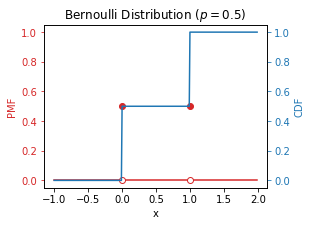

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.5
x = np.arange(-1, 2, 0.01)
PMF = np.zeros(x.shape)
CDF = np.zeros(x.shape)
for i in range(len(x)):
    if (x[i] != 0) & (x[i] != 1):
        PMF[i] = 0
        CDF[i] = 0

    elif x[i] == 1:
        PMF[i] = p

    elif(x[i] == 0):
        PMF[i] = 1 - p
        CDF[i] = 1

    if (x[i] >= 0) & (x[i] < 1):
        CDF[i] = 1 - p
    elif x[i] >= 1:
        CDF[i] = 1

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PMF, color = c1)
ax1.plot([0, 1], [0.5, 0.5], marker = 'o', linestyle = 'none', color = c1)
ax1.plot([0, 1], [0, 0], marker = 'o', linestyle = 'none', mfc = 'w', mec = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PMF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Bernoulli Distribution ($p = {p}$)')

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)
ax1.set_ylim(ax2.get_ylim())



 ## Binomial Distribution

 Scenario:
 Counting the number of heads after $n$ independent coin flips.


 Definition:
 - Let $X$ be a discrete random variable with support $R_X = \{0,1,\ldots,n\}$
 where $n \in \mathbb{N}$
 - $X$ has a *binomial* distribution with parameters $n$ and $p \in (0,1)$
 if its PMF is $p_X(x) = \begin{cases} \binom{n}{x} p^x(1-p)^{n-x} & x \in R_X \\ 0 & x \textrm{otherwise} \end{cases}$.


 $\binom{n}{x} = \frac{n!}{x!(n-x)!}$

 The binomial CDF: $F_X(x) = \begin{cases} 0 & x < 0 \\ \sum\limits_{s=0}^{\lfloor x \rfloor} \binom{n}{s} p^s (1-p)^{n-s} & 0 \leq x \leq n \\ 1 & x > n \end{cases}$

 Note: A $binomial$ random variable is a sum of $n$ jointly independent Bernoulli random variables.

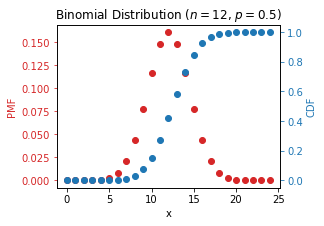

In [2]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

n = 24
p = 0.5
x = np.arange(0, n + 1, 1)
PMF = np.zeros(x.shape)
CDF = np.zeros(x.shape)
for i in range(len(x)):
    if x[i] < 0:
        PMF[i] = 0
        CDF[i] = 0

    elif (x[i] >= 0) & (x[i] <= n):

        PMF[i] = comb(n, x[i]) * (p**x[i]) * ((1 - p)**(n - x[i]))

        if np.floor(x[i]) < 1:
            j = 0
            CDF[i] += comb(n, j) * (p**j) * ((1 - p)**(n-j))
        else:
            for j in range(0, int(np.floor(x[i])), 1):
                CDF[i] += comb(n, j) * (p**j) * ((1 - p)**(n - j))

    elif(x[i] > n):
        PMF[i] = 0
        CDF[i] = 1

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))

c1 = 'tab:red'
ax1.plot(x, PMF, marker = 'o', color = c1, linestyle = 'none')
ax1.set_xlabel('x')
ax1.set_ylabel('PMF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Binomial Distribution ($n = {int(0.5*n)}$, $p = {p}$)')

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, marker = 'o', color = c2, linestyle = 'none')
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)


 ## Geometric Distribution

 Scenario:
 Counting the number of tails before the first head
 in a series of independent coin flips.


 Definition:
 - Let $X$ be a discrete random variable with support $R_X = \mathbb{Z}_+$
 - $X$ has a *geometric* distribution with parameter $p \in (0,1)$
 if its PMF is $p_X(x) = \begin{cases} p (1-p)^{x} & x \in R_X \\ 0 & x \textrm{otherwise} \end{cases}$.


 This distribution is the discrete version of the *exponential* distribution.

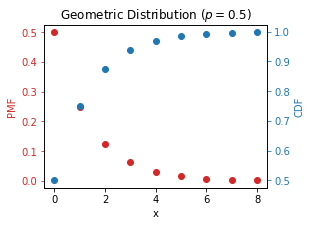

In [3]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.5
x = np.arange(0, 9, 1)
PMF = np.zeros(x.shape)
CDF = np.zeros(x.shape)
for i in range(len(x)):
    if x[i] < 0:
        PMF[i] = 0
        CDF[i] = 0
    elif x[i] >= 0:
        PMF[i] = p * (1 - p)**x[i]
        CDF[i] = 1 - (1 - p)**(x[i] + 1)        

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PMF, marker = 'o', linestyle = 'none', color = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PMF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Geometric Distribution ($p = {p}$)')

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, marker = 'o', linestyle = 'none', color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)


 ## Poisson Distribution

 Scenario:
 Counting the number of phone calls in a call centre
 when each call is independent and
 the elapsed time inbetween follows an exponential distribution.


 Definition:
 - Let $X$ be a discrete random variable with support $R_X = \mathbb{Z}_+$
 - $X$ has a *geometric* distribution with parameter $\lambda \in \mathbb{R}_{++}$
 if its PMF is
 $p_X(x) = \begin{cases} \mathrm{e}^{-\lambda} \frac{1}{x!} \lambda^x & x \in R_X \\ 0 & x \textrm{otherwise} \end{cases}$.


 The Poisson distribution is the limiting form of the binomial distribution
 wherein $p \rightarrow 0, n \rightarrow \infty$ while $\lambda = np$ remains constant.

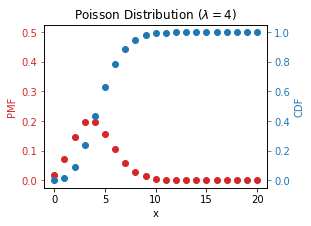

In [4]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

l = 4
x = np.arange(0, 21, 1)
PMF = np.zeros(x.shape)
CDF = np.zeros(x.shape)
for i in range(len(x)):
    if x[i] < 0:
        PMF[i] = 0
        CDF[i] = 0
    elif x[i] >= 0:
        PMF[i] = np.exp(-l) * (l**x[i]) / factorial(x[i])
        
        for j in range(int(np.floor(x[i]))):
            CDF[i] += (l**j) / factorial(j)
        CDF[i] *= np.exp(-l)

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PMF, marker = 'o', linestyle = 'none', color = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PMF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Poisson Distribution ($\lambda = {l}$)')
ax1.set_ylim(-0.025, 0.525)

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, marker = 'o', linestyle = 'none', color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)


 ## Uniform Distribution

 Scenario: Constant probability density.

 Definition:
 - Let $X$ be a continuous random variable with support $R_X = [l, u]$
 - $X$ has a *uniform* distribution on the interval $R_X$
 if its PDF is
 $f_X(x) = \begin{cases} \frac{1}{u - l} & x \in R_X \\ 0 & x \textrm{otherwise} \end{cases}$.

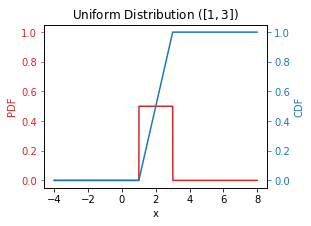

In [5]:
import numpy as np
import matplotlib.pyplot as plt

l = 1
u = 3
x = np.arange(l - 5, u + 5, 0.01)
PDF = np.zeros(x.shape)
CDF = np.zeros(x.shape)
for i in range(len(x)):
    if (x[i] < l) | (x[i] > u):
        PDF[i] = 0
    else:
        PDF[i] = 1/(u - l)

    if x[i] < l:
        CDF[i] = 0
    elif x[i] > u:
        CDF[i] = 1
    else:
        CDF[i] = (x[i] - l)/(u - l)

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PDF, color = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Uniform Distribution ($[{l}, {u}]$)')
ax1.set_ylim(-0.05, 1.05)

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)


 ## Exponential Distribution

 Scenario: Time to wait before an event occurs.

 Definition:
 - Let $X$ be a continuous random variable with support $R_X = \mathbb{R}_+$
 - $X$ has a *exponential* distribution with parameter $\lambda \in \mathbb{R}_{++}$
 if its PDF is
 $f_X(x) = \begin{cases} \lambda \mathrm{e}^{-\lambda x} & x \in R_X \\ 0 & x \textrm{otherwise} \end{cases}$.


 Proportionality: The probability of an event occuring with some time interval $\Delta$
 is proportional to the length of the time interval, $P(t < X \leq t + \Delta t \: | \: X > t) = \lambda \Delta t + \mathcal{O}(\Delta t)$ for any $t$.

 Memoryless: The probability of an event occuring within some time interval $\Delta t$
 is independent of how much time $t$ has already elapsed, $P(X \leq t + \Delta t \: | \: X > t) = P(X \leq \Delta t)$

 The sum of $n$ mutually independent exponential random variables $X_i$ is
 a *Gamma* or *Erlang* random variable $Z = \sum\limits_{i = 1}^n X_i$,
 with parameter $2n$ and $\frac{n}{\lambda}$.

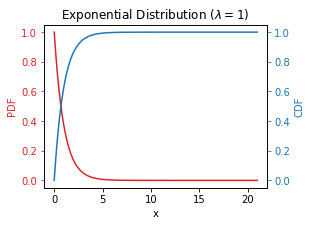

In [6]:
import numpy as np
import matplotlib.pyplot as plt

l = 1
x = np.arange(0, 21, 0.01)
PDF = np.zeros(x.shape)
CDF = np.zeros(x.shape)
for i in range(len(x)):
    if x[i] < 0:
        PDF[i] = 0
        CDF[i] = 0
    else:
        PDF[i] = l * np.exp(-l * x[i])
        CDF[i] = 1 - np.exp(-l * x[i])

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PDF, color = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Exponential Distribution ($\lambda = {l}$)')

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)


 ## Normal/Gaussian Distribution

 Scenario: The sum of many mutually independent and identically distributed random variables.

 Definition:
 - Let $X$ be a continuous random variable with support $R_X = \mathbb{R}$
 - $X$ has a *standard normal* distribution
 if its PDF is
 $f_X(x) = \frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2} x^2}$.
 - A non-standard normal distribution refers to the general case
 where $f_X(x) \rightarrow \frac{1}{\sigma} f_X(\frac{x - \mu}{\sigma})$
 and $.

 CDF: $F_X(x) = \frac{1}{2} \left[ 1 + \mathrm{erf}\left(\frac{x - \mu}{\sigma \sqrt{2}} \right) \right]$

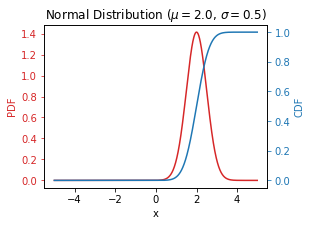

In [7]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

sig = 0.5
mu = 2.0
x = np.arange(-5, 5, 0.01)
PDF = np.zeros(x.shape)
CDF = np.zeros(x.shape)
for i in range(len(x)):
    PDF[i] = (1 / np.sqrt(2 * sig**2)) * np.exp(-(x[i] - mu)**2 / (2 * sig**2))
    CDF[i] = 0.5 * (1 + erf((x[i] - mu) / np.sqrt(2 * sig**2)))

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PDF, color = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Normal Distribution ($\mu = {mu}$, $\sigma = {sig}$)')

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)


 ## Chi-Square Distribution

 Scenario: The sum of $n$ mutually independent normal random variables squared,
 i.e. $X = \sum\limits_{i = 1}^n Y_i^2$.

 Definition:
 - Let $X$ be a continuous random variable with support $R_X = \mathbb{R}_+$
 - $X$ has a *chi-square* distribution of degree $n \in \mathbb{Z}_+$
 if its PDF is
 $f_X(x) = \begin{cases} \frac{1}{2^{n/2} \Gamma(n/2)} \: x^{n/2 - 1} \mathrm{e}^{-\frac{1}{2}x} & x \in R_X \\ 0 & \textrm{otherwise} \end{cases}$.


 Gamma function: $\Gamma(z) = \int_0^\infty x^{z - 1} \mathrm{e}^{-x} \mathrm{d}x$

 Properties:
 - The square of a standard normal random variable is
 a Chi-square random variable of degree $n = 1$.
 - The sum of independent chi-square random variables of degree $n_i$ is
 a chi-square random variable of degree $n = \sum\limits_i n_i$.


(-0.04999471096004909, 1.0498889301610308)

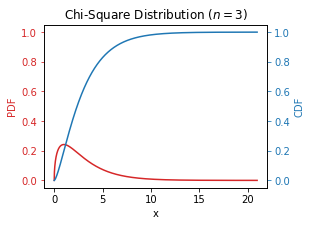

In [8]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

df = 3
x = np.arange(0, 21, 0.01)
PDF = chi2.pdf(x, df)
CDF = chi2.cdf(x, df)

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PDF, color = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Chi-Square Distribution ($n = {df}$)')

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)
ax1.set_ylim(ax2.get_ylim())


 ## Gamma Distribution

 Scenario: Generalization of the chi-square distribution;

 Definition:
 - Let $X$ be a continuous random variable with support $R_X = \mathbb{R}_+$
 - $X$ has a *gamma* distribution with parameter $n \in \mathbb{Z}_+, \: h \in \mathbb{R}_{++}$
 if its PDF is
 $f_X(x) = \begin{cases} \frac{1}{2^{n/2} \Gamma(n/2)} \: \left(\frac{n}{h} \right)^{n/2} x^{n/2 - 1} \mathrm{e}^{-\frac{n}{h}\frac{1}{2}x} & x \in R_X \\ 0 & \textrm{otherwise} \end{cases}$.


 It follows that a gamma random variable with parameters $n, h$ is
 the sum of squares of $n$ independent normal random variables
 with mean $0$ and variance $h/n$.

 ## Student's T Distribution

 Scenario: A random variable $X$ has a standard student's t distribution
 with $n$ degrees of freedom if it can be written as the ratio
 $X = \frac{Y}{\sqrt{Z}}$, where $Y$ is a standard normal random variable
 and $Z$ is a gamma random variable with parameters $n$ and $h = 1$
 (i.e. a chi-square random variable of $n$ degrees).

 Definition:
 - Let $X$ be a continuous random variable with support $R_X = \mathbb{R}$
 - $X$ has a standard *student's t* distribution with parameter $n \in \mathbb{R}_{++}$
 if its PDF is
 $f_X(x) = \frac{1}{\sqrt{n} B(\frac{n}{2},\frac{1}{2})} \left( 1 + \frac{x^2}{n} \right)^{-(n + 1)/2}$.


 Beta function: $B(x,y) = \frac{\Gamma(x) \: \Gamma(y)}{\Gamma(x + y)}$

 A non-standard student's t random variable with mean $\mu$, scale $\sigma^2$,
 and $n$ degrees of freedom is $X = \mu + \sigma \frac{Y}{\sqrt{Z}}$.

 A standard student's t random variable can be written as a normal random variable
 whose variance $\sigma^2$ is the reciprocal of a gamma random variable.

 This distribution converges to a normal distribution for large $n$.


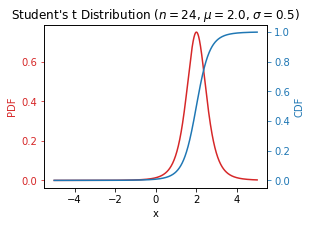

In [9]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

df = 4
mu = 2.0
sig = 0.5
x = np.arange(-5, 5, 0.01)
PDF = t.pdf(x, df, mu, sig)
CDF = t.cdf(x, df, mu, sig)

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
c1 = 'tab:red'
ax1.plot(x, PDF, color = c1)
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color = c1)
ax1.tick_params(axis = 'y', color = c1, labelcolor = c1)
ax1.set_title(f'Student\'s t Distribution ($n = {n}$, $\mu = {mu}$, $\sigma = {sig}$)')

c2 = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(x, CDF, color = c2)
ax2.set_ylabel('CDF', color = c2)
ax2.tick_params(axis = 'y', color = c2, labelcolor = c2)


